# Imports

In [596]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime

# Helper functions

In [597]:
conversion_rates = {
    'CHF': 1.14,  # 1 CHF = 1.134556 USD as of Feb 20, 2024, according to X-Rates
    'TRY': 0.032,   # 1 TRY = 0.03230 USD as of Feb 21, 2024, according to Wise
    'PLN': 0.25,  # 1 PLN = 0.250338 USD as of Feb 21, 2024, according to Xe.com
    'GBP': 1.26,      # Example rate, adjust with the actual rate when available
    'JOD': 1.41,      # Example rate, adjust with the actual rate when available
    'AUD' : 0.66,
    'BRL' : 0.2,
    'IDR' : 0.000064,
    'USD' : 1.0,
    'EUR' : 1.08,
    'ALL' : 0.010,
    'JPY' : 0.0066,
    'BDT' : 0.0091,

}


# Function to convert price to USD
def convert_to_usd(row):
    price = row['ticket_price']
    currency = row['Assigned_Currency']
    conversion_rate = conversion_rates.get(currency)  
    return price * conversion_rate


In [598]:
def clean_fifth_element(lst):
    cleaned_lst = []
    for item in lst:
        if len(item) >= 5:
            fifth_element = item[4]
            if isinstance(fifth_element, int):
                cleaned_lst.append(fifth_element)
            else:
                try:
                    cleaned_lst.append(int(fifth_element))
                except ValueError:
                    # If the fifth element cannot be converted to an integer, replace it with 0
                    cleaned_lst.append(0)
        else:
            cleaned_lst.append(0)  # If the list is too short, consider the fifth element as 0
    return cleaned_lst



In [599]:


def convert_list_to_datetime(date_list):
    # Convert 'null' strings to 0 and other elements to integers
    date_list = [0 if element == 'null' else int(element) for element in date_list]
    
    try:
        if len(date_list) == 5:
            # If all components are present, unpack the list directly into datetime
            return datetime(*date_list)
        elif len(date_list) == 4:
            # If the minute is missing (or any single component), append 0 for minutes and then convert
            return datetime(*(date_list + [0]))
        else:
            # Return None for lists of unexpected length to indicate an issue
            return None
    except TypeError:
        # Handle cases where the list contents cannot be directly unpacked into datetime
        return None




In [600]:
def clean_fifth_element(lst):
    cleaned_lst = []
    for item in lst:
        if len(item) >= 5:
            fifth_element = item[4]
            if isinstance(fifth_element, int):
                cleaned_lst.append(item[:4] + [fifth_element] + item[5:])
            else:
                try:
                    cleaned_lst.append(item[:4] + [int(fifth_element)] + item[5:])
                except ValueError:
                    # If the fifth element cannot be converted to an integer, replace it with 0
                    cleaned_lst.append(item[:4] + [0] + item[5:])
        else:
            # If the list is too short, consider the fifth element as 0
            cleaned_lst.append(item[:4] + [0])
    return cleaned_lst



# Cleaning Dataset

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12464 entries, 0 to 12463
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   airline_code                 12464 non-null  object        
 1   departure_airport_code       12464 non-null  object        
 2   destination_airport_code     12464 non-null  object        
 3   departure_date               12464 non-null  datetime64[ns]
 4   arrival_date                 12464 non-null  datetime64[ns]
 5   ticket_price                 12464 non-null  int64         
 6   First_flight                 12464 non-null  object        
 7   first_flight_code            11774 non-null  object        
 8   last_flight_code             12464 non-null  object        
 9   Detected_Language            12464 non-null  object        
 10  Assigned_Country             12464 non-null  object        
 11  Assigned_Currency            12464 non-nu

In [567]:
df = pd.read_csv('../output/Query4_results_datefix.csv')

In [595]:
df.first_flight_code.value_counts()

first_flight_code
LH1731    132
AC8681    120
NK154      72
NH970      70
SQ431      68
         ... 
AF1801      2
KL1502      2
EN8751      2
SQ935       2
LH1197      2
Name: count, Length: 720, dtype: int64

In [594]:
df.head()

,airline_code,departure_airport_code,destination_airport_code,departure_date,arrival_date,ticket_price,First_flight,first_flight_code,last_flight_code,Detected_Language,Assigned_Country,Assigned_Currency,ID_Helper,Price_in_USD,Flight_ID,commute_time,Duplicate_checker,FlightID_in_Countries_Count
0,AA,CLT,CUN,2024-06-26 07:15:00,2024-06-26 09:10:00,383,CLT-CUN,AA881,AA881,Deutsch,Deutschland,EUR,6American26,413.64,AA-CLT-CUN-CLT-CUN-AA881-2024-06-26 09:10:00-2024-06-26 07:15:00-6American26,115.0,"AA-CLT-CUN-CLT-CUN-AA881-2024-06-26 09:10:00-2024-06-26 07:15:00-6American26DeutschlandDeutsch0 383\n1 383\n2 383\n3 410\n4 401\n ... \n12459 18825\n12460 18825\n12461 18825\n12462 18825\n12463 19548\nName: ticket_price, Length: 12464, dtype: int646American26",8
1,AA,CLT,CUN,2024-06-26 11:50:00,2024-06-26 13:54:00,383,CLT-CUN,AA886,AA886,Deutsch,Deutschland,EUR,6American26,413.64,AA-CLT-CUN-CLT-CUN-AA886-2024-06-26 13:54:00-2024-06-26 11:50:00-6American26,124.0,"AA-CLT-CUN-CLT-CUN-AA886-2024-06-26 13:54:00-2024-06-26 11:50:00-6American26DeutschlandDeutsch0 383\n1 383\n2 383\n3 410\n4 401\n ... \n12459 18825\n12460 18825\n12461 18825\n12462 18825\n12463 19548\nName: ticket_price, Length: 12464, dtype: int646American26",8
2,AA,CLT,CUN,2024-06-26 13:05:00,2024-06-26 14:59:00,383,CLT-CUN,AA1778,AA1778,Deutsch,Deutschland,EUR,6American26,413.64,AA-CLT-CUN-CLT-CUN-AA1778-2024-06-26 14:59:00-2024-06-26 13:05:00-6American26,114.0,"AA-CLT-CUN-CLT-CUN-AA1778-2024-06-26 14:59:00-2024-06-26 13:05:00-6American26DeutschlandDeutsch0 383\n1 383\n2 383\n3 410\n4 401\n ... \n12459 18825\n12460 18825\n12461 18825\n12462 18825\n12463 19548\nName: ticket_price, Length: 12464, dtype: int646American26",8
3,AA,CLT,CUN,2024-06-26 09:05:00,2024-06-26 11:13:00,410,CLT-CUN,AA895,AA895,Deutsch,Deutschland,EUR,6American26,442.80,AA-CLT-CUN-CLT-CUN-AA895-2024-06-26 11:13:00-2024-06-26 09:05:00-6American26,128.0,"AA-CLT-CUN-CLT-CUN-AA895-2024-06-26 11:13:00-2024-06-26 09:05:00-6American26DeutschlandDeutsch0 383\n1 383\n2 383\n3 410\n4 401\n ... \n12459 18825\n12460 18825\n12461 18825\n12462 18825\n12463 19548\nName: ticket_price, Length: 12464, dtype: int646American26",8
4,UA,CLT,CUN,2024-06-26 10:07:00,2024-06-26 15:51:00,401,CLT-IAD,UA1361,UA1618,Deutsch,Deutschland,EUR,2024United6,433.08,UA-CLT-CUN-CLT-IAD-UA1618-2024-06-26 15:51:00-2024-06-26 10:07:00-2024United6,344.0,"UA-CLT-CUN-CLT-IAD-UA1618-2024-06-26 15:51:00-2024-06-26 10:07:00-2024United6DeutschlandDeutsch0 383\n1 383\n2 383\n3 410\n4 401\n ... \n12459 18825\n12460 18825\n12461 18825\n12462 18825\n12463 19548\nName: ticket_price, Length: 12464, dtype: int642024United6",8


In [568]:
df["ID_Helper"] = df["departure_time"].astype(str) + df["selling_airline"].astype(str) + df["arrival_time"].astype(str)

In [569]:
df = df.drop(['departure_time','selling_airline','arrival_time'], axis = 1)

In [570]:
df['Price_in_USD'] = df.apply(convert_to_usd, axis=1)

In [571]:
for i in ['arrival_date','departure_date']:
    df[i] = df[i].apply(ast.literal_eval)

In [572]:
df['arrival_date'] = clean_fifth_element(df['arrival_date'])


In [573]:
df['departure_date'] = clean_fifth_element(df['departure_date'])

In [574]:
for i in ['arrival_date','departure_date']:
    df[i] = df[i].apply(convert_list_to_datetime)

# Feature engineering

Create FlightID

In [575]:
df['Flight_ID'] = df[['airline_code', 'departure_airport_code', 'destination_airport_code','First_flight','last_flight_code','arrival_date','departure_date', 'ID_Helper']].astype(str).agg('-'.join, axis=1)

Creating commutime time

In [576]:
df['commute_time'] = (df['arrival_date'] - df['departure_date']).dt.total_seconds() / 60

For every Flight_ID, how many unique countires is there data from

In [577]:
df["Duplicate_checker"] = df['Flight_ID'] + df['Assigned_Country'] + df["Detected_Language"] + str(df["ticket_price"]) + df["ID_Helper"]

In [578]:
# Count the number of different countries available per Flight_ID
country_count_per_flight = df.groupby('Flight_ID')['Assigned_Country'].nunique().reset_index(name='FlightID_in_Countries_Count')

# Merge this count back into the original dataframe
df = df.merge(country_count_per_flight, on='Flight_ID')


Drop Duplicates

In [579]:
# Remove duplicates based on the 'Duplicate_checker' column
df_reduced = df.drop_duplicates(subset='Duplicate_checker', keep='first')


# Descriptive Statistics

In [580]:
# Group by Flight_ID and calculate max, min prices and their absolute difference
price_stats = df_reduced.groupby('Flight_ID')['Price_in_USD'].agg([max, min])
price_stats['abs_diff'] = price_stats['max'] - price_stats['min']

# Calculate the relative difference as a percentage of the min price
price_stats['rel_diff'] = (price_stats['abs_diff'] / price_stats['min']) * 100

# Filter to find cases where the relative difference is greater than %
significant_diffs = price_stats[price_stats['rel_diff'] > 4]

# If you want to see full details of the flights, merge back with the original df
significant_flight_details = df_reduced.merge(significant_diffs, left_on='Flight_ID', right_index=True)




/var/folders/fs/20409g9545qdjn0qhsrcd8q80000gn/T/ipykernel_56647/2804641502.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  price_stats = df_reduced.groupby('Flight_ID')['Price_in_USD'].agg([max, min])
/var/folders/fs/20409g9545qdjn0qhsrcd8q80000gn/T/ipykernel_56647/2804641502.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  price_stats = df_reduced.groupby('Flight_ID')['Price_in_USD'].agg([max, min])


In [581]:
df_reduced = pd.merge(df_reduced, price_stats, on='Flight_ID', how='left')

In [582]:
df_reduced.columns

Index(['airline_code', 'departure_airport_code', 'destination_airport_code',
       'departure_date', 'arrival_date', 'ticket_price', 'First_flight',
       'first_flight_code', 'last_flight_code', 'Detected_Language',
       'Assigned_Country', 'Assigned_Currency', 'ID_Helper', 'Price_in_USD',
       'Flight_ID', 'commute_time', 'Duplicate_checker',
       'FlightID_in_Countries_Count', 'max', 'min', 'abs_diff', 'rel_diff'],
      dtype='object')

In [591]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5775 entries, 0 to 5774
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   airline_code                 5775 non-null   object        
 1   departure_airport_code       5775 non-null   object        
 2   destination_airport_code     5775 non-null   object        
 3   departure_date               5775 non-null   datetime64[ns]
 4   arrival_date                 5775 non-null   datetime64[ns]
 5   ticket_price                 5775 non-null   int64         
 6   First_flight                 5775 non-null   object        
 7   first_flight_code            5481 non-null   object        
 8   last_flight_code             5775 non-null   object        
 9   Detected_Language            5775 non-null   object        
 10  Assigned_Country             5775 non-null   object        
 11  Assigned_Currency            5775 non-null 

In [586]:
df_reduced.describe()

,departure_date,arrival_date,ticket_price,Price_in_USD,commute_time,FlightID_in_Countries_Count,max,min,abs_diff,rel_diff
count,5775,5775,5.775000e+03,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000
mean,2024-08-05 05:05:18.940259584,2024-08-05 19:34:55.148051968,2.502209e+06,1567.590254,869.603463,6.662338,1596.826863,1526.240701,70.586162,4.723055
min,2024-02-26 00:45:00,2024-02-27 07:50:00,4.300000e+01,60.013800,-65.000000,1.000000,60.720000,60.013800,0.000000,0.000000
25%,2024-05-10 17:00:00,2024-05-10 22:45:00,1.222000e+03,519.840000,310.000000,6.000000,523.260000,510.040000,7.768200,1.280583
50%,2024-08-23 17:30:00,2024-08-23 18:40:00,6.283000e+03,1047.600000,655.000000,7.000000,1059.960000,1028.120000,30.120000,4.425771
75%,2024-11-05 13:55:00,2024-11-06 17:55:00,9.265500e+04,1842.610000,1263.000000,8.000000,1861.200000,1778.430000,63.530000,4.629589
max,2024-12-28 08:17:00,2024-12-29 20:15:00,4.393188e+08,28249.320000,4260.000000,11.000000,28249.320000,28011.060000,4026.600000,257.689565
std,NaN,NaN,1.250712e+07,2130.853195,718.551641,2.580722,2159.616760,2086.297158,245.380055,15.783333


/var/folders/fs/20409g9545qdjn0qhsrcd8q80000gn/T/ipykernel_56647/2533043940.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rel_diff_by_price_cat = df_reduced.groupby('Price_Category')['rel_diff'].mean().reset_index()


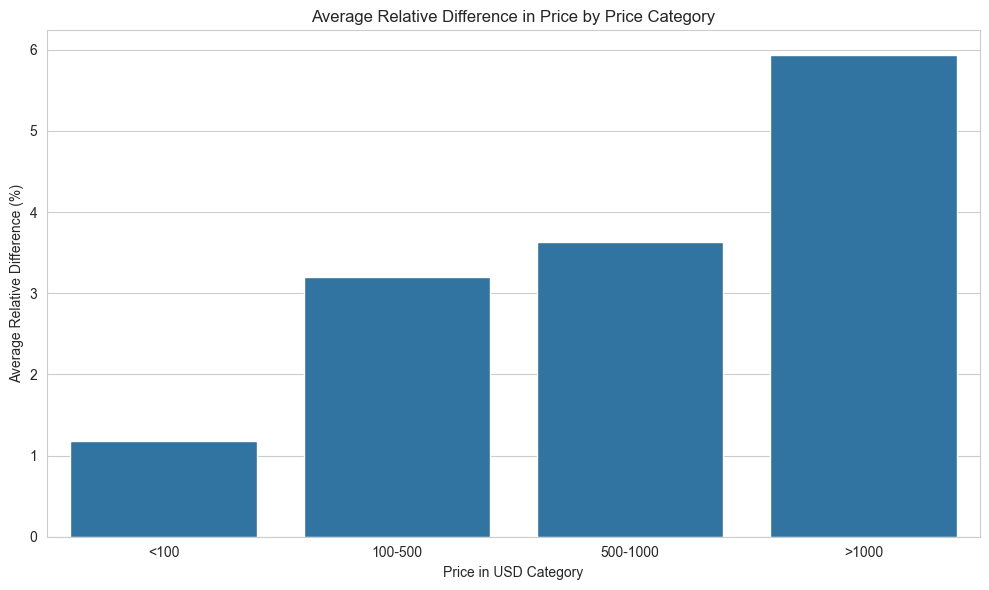

In [587]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bins and labels for 'Price_in_USD'
bins = [0, 100, 500, 1000, float('inf')]
labels = ['<100', '100-500', '500-1000', '>1000']

# Bin 'Price_in_USD' into the defined categories
df_reduced['Price_Category'] = pd.cut(df_reduced['Price_in_USD'], bins=bins, labels=labels)

# Group by the new 'Price_Category' and calculate the mean 'rel_diff' for each category
avg_rel_diff_by_price_cat = df_reduced.groupby('Price_Category')['rel_diff'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rel_diff_by_price_cat, x='Price_Category', y='rel_diff')
plt.title('Average Relative Difference in Price by Price Category')
plt.xlabel('Price in USD Category')
plt.ylabel('Average Relative Difference (%)')
plt.tight_layout()
plt.show()


/var/folders/fs/20409g9545qdjn0qhsrcd8q80000gn/T/ipykernel_56647/1814516345.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rel_diff_by_commute_cat = df_reduced.groupby('Commute_Time_Category')['rel_diff'].mean().reset_index()


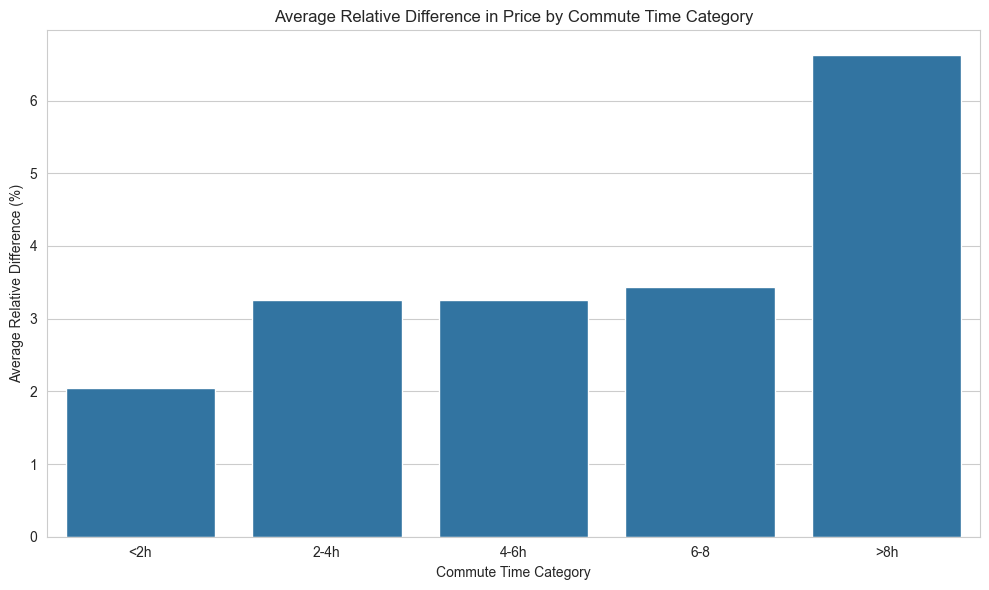

In [589]:
# Adjust bins based on the new categories in minutes
bins = [-float('inf'), 120, 240, 480,750, float('inf')]
labels = ['<2h', '2-4h', '4-6h','6-8' ,'>8h']

# Bin 'commute_time' into categories directly, no need to convert to hours since it's already in minutes
df_reduced['Commute_Time_Category'] = pd.cut(df_reduced['commute_time'], bins=bins, labels=labels)

# Group by the new 'Commute_Time_Category' and calculate the mean 'rel_diff' for each category
avg_rel_diff_by_commute_cat = df_reduced.groupby('Commute_Time_Category')['rel_diff'].mean().reset_index()

# Plotting the average relative difference by commute time category
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rel_diff_by_commute_cat, x='Commute_Time_Category', y='rel_diff')
plt.title('Average Relative Difference in Price by Commute Time Category')
plt.xlabel('Commute Time Category')
plt.ylabel('Average Relative Difference (%)')
plt.tight_layout()
plt.show()


In [590]:
# Assuming 'price_stats' is the DataFrame that contains the relative differences for each Flight_ID
# And assuming 'price_stats' already contains the 'rel_diff' column calculated as earlier described

# Define the thresholds
thresholds = [3, 5, 10]

# Initialize a dictionary to hold the counts
distribution_counts = {}

# Calculate the percentage of total flights for each threshold
total_flights = len(price_stats)
for threshold in thresholds:
    count_above_threshold = len(price_stats[price_stats['rel_diff'] > threshold])
    distribution_counts[f"Above {threshold}%"] = (count_above_threshold / total_flights) * 100

# Print the distribution of flights per category
for category, percent in distribution_counts.items():
    print(f"{category}: {percent:.2f}% of total flights")


Above 3%: 38.13% of total flights
Above 5%: 2.41% of total flights
Above 10%: 1.06% of total flights


In [ ]:
# Calculate statistics for the original reduced dataset
original_stats = {
    'mean': df_reduced.Price_in_USD.mean(),
    'median': df_reduced.Price_in_USD.median(),
    'std_dev': df_reduced.Price_in_USD.std(),
    'min': df_reduced.Price_in_USD.min(),
    'max': df_reduced.Price_in_USD.max(),
    'count': df_reduced.Price_in_USD.count()
}

# Calculate statistics for the significant differences dataset
significant_stats = {
    'mean': significant_flight_details.Price_in_USD.mean(),
    'median': significant_flight_details.Price_in_USD.median(),
    'std_dev': significant_flight_details.Price_in_USD.std(),
    'min': significant_flight_details.Price_in_USD.min(),
    'max': significant_flight_details.Price_in_USD.max(),
    'count': significant_flight_details.Price_in_USD.count()
}

# Print the comparison
print("Original Dataset Statistics:")
print(original_stats)
print("\nSignificant Differences Dataset Statistics:")
print(significant_stats)


Original Dataset Statistics:
{'mean': 1563.8086440421196, 'median': 1045.0, 'std_dev': 2129.350952749131, 'min': 60.013799999999996, 'max': 28249.32, 'count': 5793}

Significant Differences Dataset Statistics:
{'mean': 916.8889662608696, 'median': 126.53999999999999, 'std_dev': 1523.4171546127207, 'min': 102.88, 'max': 10747.44, 'count': 299}


In [ ]:
# Get the top 10 'First_flight' for the original reduced dataset
top_first_flights_original = df_reduced['First_flight'].value_counts().head(10)

# Print the top 10 'First_flight' codes for the original reduced dataset
print("Top 10 First Flights in Original Dataset:")
print(top_first_flights_original)


Top 10 First Flights in Original Dataset:
First_flight
LAS-LAX    160
FCO-MAD    160
SEA-DFW    128
DFW-SEA    120
LHR-CDG    108
DFW-EWR     90
ZAG-MUC     83
MAN-LHR     70
LAX-YVR     69
BWI-YYZ     60
Name: count, dtype: int64


In [ ]:
# Get the top 10 'First_flight' for the significant differences dataset
top_first_flights_significant = significant_flight_details['First_flight'].value_counts().head(10)

# Print the top 10 'First_flight' codes for the significant differences dataset
print("\nTop 10 First Flights in Significant Differences Dataset:")
print(top_first_flights_significant)



Top 10 First Flights in Significant Differences Dataset:
First_flight
MAN-DXB    20
FCO-MAD    10
PHX-ATL    10
PHX-IAH    10
LAX-YUL    10
MAN-AMS    10
MAN-DOH    10
LAX-EWR     9
LAX-IAD     9
LAX-PHL     9
Name: count, dtype: int64


In [ ]:
df_reduced.columns

Index(['airline_code', 'departure_airport_code', 'destination_airport_code',
       'departure_date', 'arrival_date', 'ticket_price', 'First_flight',
       'first_flight_code', 'last_flight_code', 'Detected_Language',
       'Assigned_Country', 'Assigned_Currency', 'ID_Helper', 'Price_in_USD',
       'Flight_ID', 'Duplicate_checker', 'Duplicate_Count',
       'Flight_ID_country_language', 'FlightID_in_Countries_Count'],
      dtype='object')

In [ ]:
# Add mean and median of 'commute_time' to the statistics
original_stats.update({
    'commute_time_min': df_reduced.commute_time.min(),
    'commute_time_mean': df_reduced.commute_time.mean(),
    'commute_time_median': df_reduced.commute_time.median(),
})

significant_stats.update({
    'commute_time_min': significant_flight_details.commute_time.min(),
    'commute_time_mean': significant_flight_details.commute_time.mean(),
    'commute_time_median': significant_flight_details.commute_time.median(),
})

# Print the comparison
print("Original Dataset Statistics:")
print(original_stats)
print("\nSignificant Differences Dataset Statistics:")
print(significant_stats)


Original Dataset Statistics:
{'mean': 1563.8086440421196, 'median': 1045.0, 'std_dev': 2129.350952749131, 'min': 60.013799999999996, 'max': 28249.32, 'count': 5793, 'commute_time_mean': 869.6034632034632, 'commute_time_median': 655.0, 'commute_time_min': -65.0}

Significant Differences Dataset Statistics:
{'mean': 916.8889662608696, 'median': 126.53999999999999, 'std_dev': 1523.4171546127207, 'min': 102.88, 'max': 10747.44, 'count': 299, 'commute_time_mean': 1211.625, 'commute_time_median': 1270.0, 'commute_time_min': 155.0}


In [ ]:
# Get the top 10 departure airports for the original reduced dataset
top_departure_airports_original = df_reduced.departure_airport_code.value_counts().head(10)
top_destination_airports_original = df_reduced.destination_airport_code.value_counts().head(10)

# Get the top 10 departure airports for the significant differences dataset
top_departure_airports_significant = significant_flight_details.departure_airport_code.value_counts().head(10)
top_destination_airports_significant = significant_flight_details.destination_airport_code.value_counts().head(10)

# Print the top 10 airports for the original reduced dataset
print("Top 10 Departure Airports in Original Dataset:")
print(top_departure_airports_original)
print("\nTop 10 Destination Airports in Original Dataset:")
print(top_destination_airports_original)

# Print the top 10 airports for the significant differences dataset
print("\nTop 10 Departure Airports in Significant Differences Dataset:")
print(top_departure_airports_significant)
print("\nTop 10 Destination Airports in Significant Differences Dataset:")
print(top_destination_airports_significant)


Top 10 Departure Airports in Original Dataset:
departure_airport_code
DFW    332
MAN    311
ZAG    289
BWI    209
LAX    198
FCO    194
MIA    176
MSY    176
LAS    160
LUX    158
Name: count, dtype: int64

Top 10 Destination Airports in Original Dataset:
destination_airport_code
LIM    264
EWR    237
LAX    225
IAH    218
SFO    205
MAD    205
YVR    190
FRA    183
CUN    173
NRT    170
Name: count, dtype: int64

Top 10 Departure Airports in Significant Differences Dataset:
departure_airport_code
MAN    47
LAX    37
PHX    20
FCO    10
IAD     6
Name: count, dtype: int64

Top 10 Destination Airports in Significant Differences Dataset:
destination_airport_code
CPT    47
LIS    37
CGH    20
MAD    10
CAN     6
Name: count, dtype: int64


# Statistical Testing

In [ ]:
df.to_csv('export.csv')

In [ ]:
from scipy.stats import f_oneway

# Assuming 'flight_data' is your DataFrame containing flight information
# 'Price' is the column containing flight prices, and 'Country' is the column containing country information

# Extract prices for each country
prices_by_country = [group['Price_in_USD'].values for name, group in df.groupby('Flight_ID')]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*prices_by_country)

# Interpret the results
alpha = 0.05  # Significance level
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("There are statistically significant differences in mean flight prices among different countries.")
else:
    print("There are no statistically significant differences in mean flight prices among different countries.")


ANOVA results:
F-statistic: 3634.3053790214753
p-value: 0.0
There are statistically significant differences in mean flight prices among different countries.


In [ ]:
from scipy.stats import f_oneway

# Assuming 'df' is your DataFrame containing flight information
# 'Price_in_USD' is the column containing flight prices, and 'Assigned_Country' is the column containing country information

# Extract prices for each country
prices_by_country = [group['Price_in_USD'].values for name, group in df.groupby('Assigned_Country')]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*prices_by_country)

# Interpret the results
alpha = 0.05  # Significance level
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("There are statistically significant differences in mean flight prices among different countries for the same flight route.")
else:
    print("There are no statistically significant differences in mean flight prices among different countries for the same flight route.")


ANOVA results:
F-statistic: 6.859678831405712
p-value: 2.270373590682325e-13
There are statistically significant differences in mean flight prices among different countries for the same flight route.


In [ ]:
from scipy.stats import f_oneway

# Assuming 'df' is your DataFrame containing flight information
# 'Price_in_USD' is the column containing flight prices, 'Assigned_Country' is the column containing country information
# 'Flight_ID' is the column containing flight identifiers

# Extract prices for each flight route and country
prices_by_route_and_country = [group['Price_in_USD'].values for name, group in df.groupby(['Flight_ID', 'Assigned_Country'])]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*prices_by_route_and_country)

# Interpret the results
alpha = 0.05  # Significance level
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("There are statistically significant differences in mean flight prices among different countries for the same flight route.")
else:
    print("There are no statistically significant differences in mean flight prices among different countries for the same flight route.")


ANOVA results:
F-statistic: 13924.582904661333
p-value: 0.0
There are statistically significant differences in mean flight prices among different countries for the same flight route.


In [ ]:
from scipy.stats import ttest_rel

# Assuming 'df' is your DataFrame containing flight information
# 'Price_in_USD' is the column containing flight prices, and 'Flight_ID' is the column containing flight identifiers

# Group the data by Flight_ID and calculate the maximum and minimum prices for each group
max_prices = df.groupby('Flight_ID')['Price_in_USD'].max()
min_prices = df.groupby('Flight_ID')['Price_in_USD'].min()

# Perform paired samples t-test
t_statistic, p_value = ttest_rel(max_prices, min_prices)

# Interpret the results
alpha = 0.05  # Significance level
print("Paired samples t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("There is a statistically significant difference between the maximum and minimum prices of each Flight_ID.")
else:
    print("There is no statistically significant difference between the maximum and minimum prices of each Flight_ID.")


Paired samples t-test results:
t-statistic: 7.683652766554402
p-value: 2.9911633978073155e-14
There is a statistically significant difference between the maximum and minimum prices of each Flight_ID.


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Flight_ID'], df['Assigned_Country'])

# Perform chi-square test of independence
chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05  # Significance level
print("Chi-square test results:")
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("There is a significant association between Flight_ID and Assigned_Country.")
else:
    print("There is no significant association between Flight_ID and Assigned_Country.")


Chi-square test results:
Chi-square statistic: 27962.6387916702
p-value: 0.0
There is a significant association between Flight_ID and Assigned_Country.


In [ ]:
from scipy.stats import kruskal

full_results = []

for flight_id, group in df_reduced.groupby('Flight_ID'):
    if df_reduced.FlightID_in_Countries_Count > 0:  # Ensure there are prices from at least two countries
        # Extract prices for each country for the current flight
        prices_by_country = [grp['Price_in_USD'].values for _, grp in group.groupby('Assigned_Country')]
        if len(prices_by_country) > 1:  # Perform Kruskal-Wallis if there are prices from at least two countries
            stat, p = kruskal(*prices_by_country)
            full_results.append((flight_id, stat, p, len(prices_by_country)))

# Convert the full results into a DataFrame for better readability
full_results_df = pd.DataFrame(full_results, columns=['Flight_ID', 'Kruskal_Stat', 'P_Value', 'Countries_Compared'])

# Filter out the full results with p-values indicating significant differences
significant_full_results = full_results_df[full_results_df['P_Value'] < 0.05]

significant_full_results


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().